<a href="https://colab.research.google.com/github/youcan0827/todo-app/blob/main/Z_Image_Turbo_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/huggingface/diffusers git+https://github.com/Disty0/sdnq

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-6njwnist
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-6njwnist
  Resolved https://github.com/huggingface/diffusers to commit 8b4722de57a9a2646466b8bb7095c4fd465193fa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/Disty0/sdnq to /tmp/pip-req-build-foooh0t6
  Running command git clone --filter=blob:none --quiet https://github.com/Disty0/sdnq /tmp/pip-req-build-foooh0t6
  Resolved https://github.com/Disty0/sdnq to commit 6a5be4441c3a25138214eca58270da61c88b65d4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4617634 sha256=f6dd13a04f71856d13a4baad6ce41a1b26998e190e6

In [2]:
import torch
import diffusers
from sdnq import SDNQConfig # import sdnq to register it into diffusers and transformers
from sdnq.loader import apply_sdnq_options_to_model

pipe = diffusers.ZImagePipeline.from_pretrained("Disty0/Z-Image-Turbo-SDNQ-uint4-svd-r32", torch_dtype=torch.float32, device_map="cuda")
pipe.transformer = apply_sdnq_options_to_model(pipe.transformer, use_quantized_matmul=True)
pipe.text_encoder = apply_sdnq_options_to_model(pipe.text_encoder, use_quantized_matmul=True)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/487 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/3.48G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/9 [00:00<?, ?it/s]

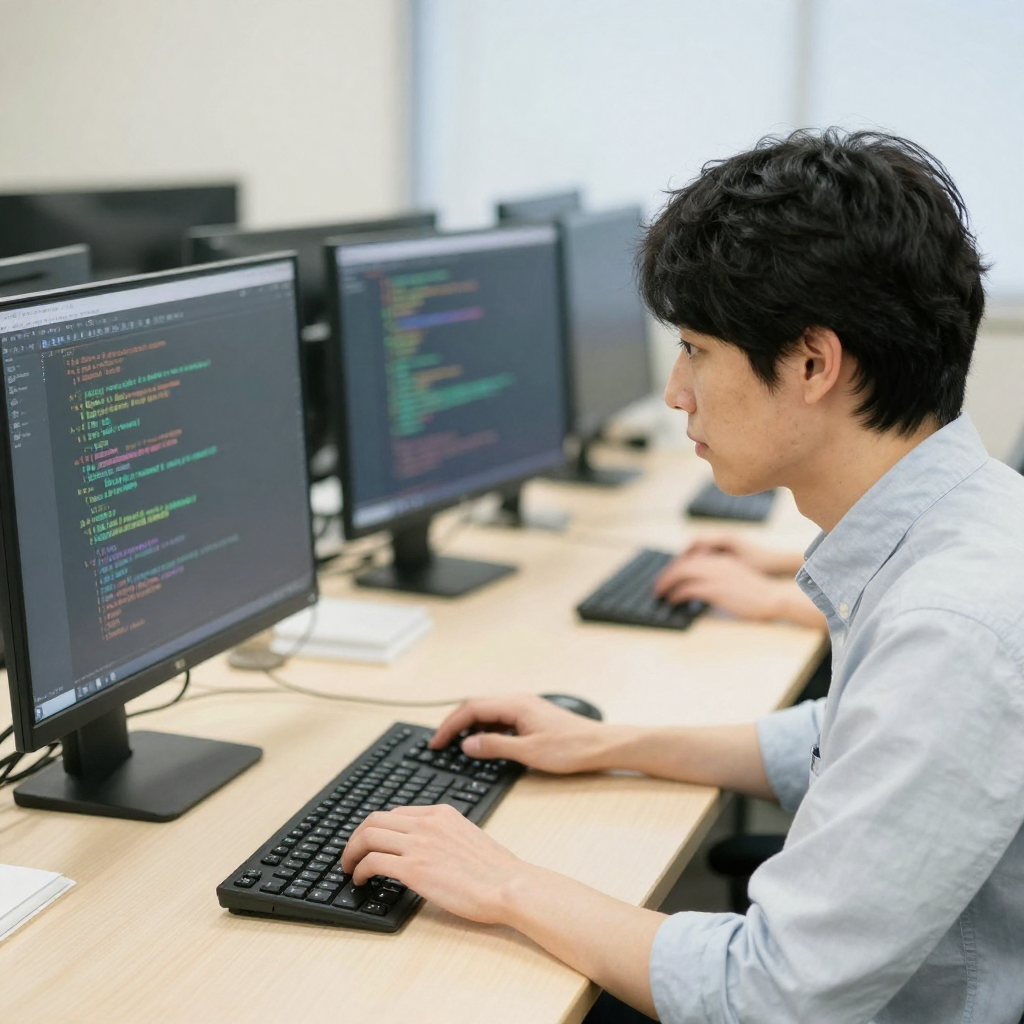

In [4]:
prompt = "日本人がパソコンでプログラミングしている画像"
image = pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    num_inference_steps=9,
    guidance_scale=0.0,
    generator=torch.manual_seed(42),
).images[0]
display(image)